<!--Información del curso-->
<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">

<center><h1 style="font-size:2em;color:#2467C0"> Caso de estudio: Juegos Olimpicos  </h1></center>

<center><h2 style="font-size:2em;color:#840700">  Pandas   </h4></center>

<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/WesM.png" align="left" style="width:500px"/></td>
<td>

* **Wes McKinney**, empezó a desarrollar Pandas en el año 2008 mientras trabajaba en *AQR Capital* [https://www.aqr.com/] por la necesidad que tenía de una herramienta flexible de alto rendimiento para realizar análisis cuantitativos en datos financieros. 
* Antes de dejar AQR convenció a la administración de la empresa de distribuir esta biblioteca bajo licencia de código abierto.
* **Pandas** es un acrónimo de **PANel DAta analysiS**
   
    
<br>
</td>
</tr>
</table>

# Librerías

Cargando las bibliotecas que necesitamos 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Datos
* Revisar las primeras líneas de los archivos
* Utilizar las funciones de descripción e información para recopilar información estadística, tipos de datos, nombres de columnas y otra información. 



In [2]:
#Cargar el archivo datos/athlete_events.csv en un dataframe llamado df_atletas
df_atletas = pd.read_csv('datos/athlete_events.csv')

In [3]:
#Revisar las primeras líneas de los archivos
df_atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Encontrar los principales valores estadísticos 
df_atletas.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
df_paises = pd.read_csv('datos/noc_regions.csv')

In [6]:
df_paises.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### 1 . Combinando los dataframes
Combinar los dataframes **df_paises** y **df_atletas** en un dataframe llamado **df**. 

*Utilizar la columna 'NOC'*

In [7]:
df=pd.merge(df_atletas, df_paises, on='NOC')


In [8]:

df.set_index('ID', inplace=True)
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### 2. Dataframe de medallas de oro 
Crear un dataframe solo de medallas de oro


In [9]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [10]:
df_MedallasOro = df[df['Medal']=='Gold']
df_MedallasOro.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


#####  Distribución de edades de medallas de oro 


In [11]:
df['Age'].isnull().sum()  

np.int64(9462)

In [12]:
df['Age'].unique()

array([24., 23., 34., 21., 25., 27., 31., 33., 18., 26., 22., 30., 32.,
       28., 54., 20., 17., 43., 47., 29., 41., 45., 49., 53., 57., nan,
       19., 38., 35., 16., 37., 15., 42., 46., 40., 36., 14., 39., 48.,
       52., 44., 55., 50., 71., 63., 51., 58., 13., 60., 75., 65., 56.,
       64., 68., 84., 12., 72., 59., 61., 70., 74., 62., 67., 69., 73.,
       66., 11., 76., 88., 96., 80., 10., 81., 77., 97.])

In [13]:
#De manera general

df.fillna({'Age':int(df['Age'].mean())}, inplace=True)

In [14]:
# Eliminar las filas con 'nan' 


In [15]:
#Mostrar nuevamente los posibles valores de la columna 'Age'
df.Age.unique()

array([24., 23., 34., 21., 25., 27., 31., 33., 18., 26., 22., 30., 32.,
       28., 54., 20., 17., 43., 47., 29., 41., 45., 49., 53., 57., 19.,
       38., 35., 16., 37., 15., 42., 46., 40., 36., 14., 39., 48., 52.,
       44., 55., 50., 71., 63., 51., 58., 13., 60., 75., 65., 56., 64.,
       68., 84., 12., 72., 59., 61., 70., 74., 62., 67., 69., 73., 66.,
       11., 76., 88., 96., 80., 10., 81., 77., 97.])

In [16]:
# ¿Cuantas personas mayores a 50 han ganado una medalla de oro?
len(df_MedallasOro[df_MedallasOro['Age']>50])

65

##### ¿Qué disciplinas te permiten conseguir una medalla de oro después de los cincuenta? 

In [17]:
#Mostrar las diferentes disciplinas (mayores a 50)
df_MedallasOro[df_MedallasOro['Age']>50]['Sport'].unique()

array(['Equestrianism', 'Sailing', 'Alpinism', 'Art Competitions',
       'Curling', 'Roque', 'Shooting', 'Archery', 'Croquet'], dtype=object)

In [18]:
#Mostrar el número de ganadores por disciplina (mayores a 50)
df_MedallasOro[df_MedallasOro['Age']>50]['Sport'].value_counts()

Sport
Equestrianism       18
Sailing             12
Shooting            11
Archery             11
Art Competitions     8
Curling              2
Alpinism             1
Roque                1
Croquet              1
Name: count, dtype: int64

### 3. Mujeres en atletismo 


In [19]:
# Crear un dataframe para mujeres llamado df_women 
# Considerar solamente los juegos de verano

df['Sex'].unique()


array(['M', 'F'], dtype=object)

In [20]:
df['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

In [21]:
df_women = df[(df['Sex']=='F') & (df['Season']=='Summer')]
df_women.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


<Axes: xlabel='Year'>

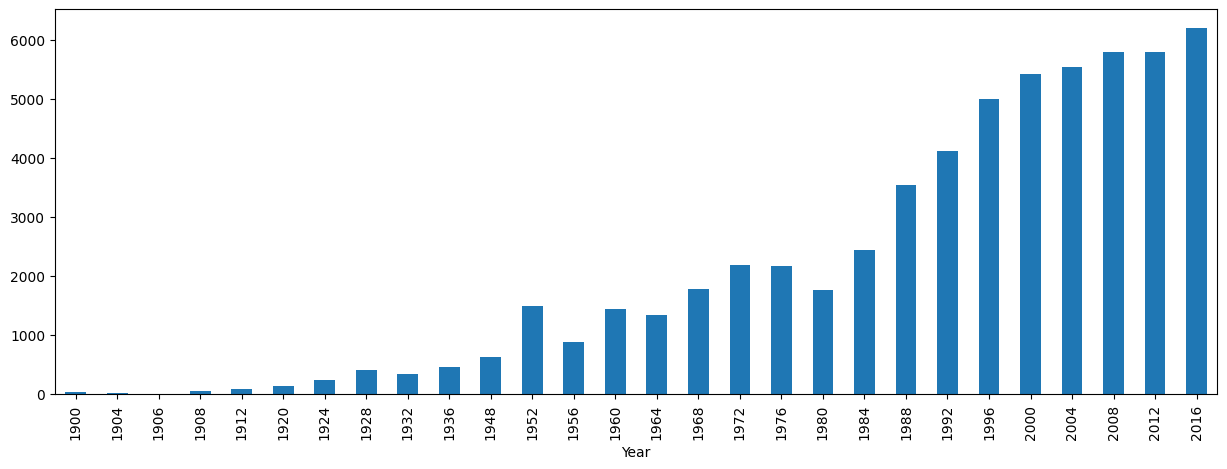

In [22]:
#Crear un gráfico en el que colocamos el año (en el eje x) 
# y contamos el número de participantes por edición de los juegos

df_women.groupby('Year').size().plot(kind='bar', figsize=(15,5))

In [23]:
#Revisar el numero de participantes mujeres en 2016
df_women[df_women['Year']==2016].shape

(6203, 16)

In [24]:
#Revisar el numero de participantes mujeres en 2016 con medalla de oro
df_women[(df_women['Year']==2016)&(df_women['Medal']=='Gold')].shape[0]

318

<Axes: xlabel='Year'>

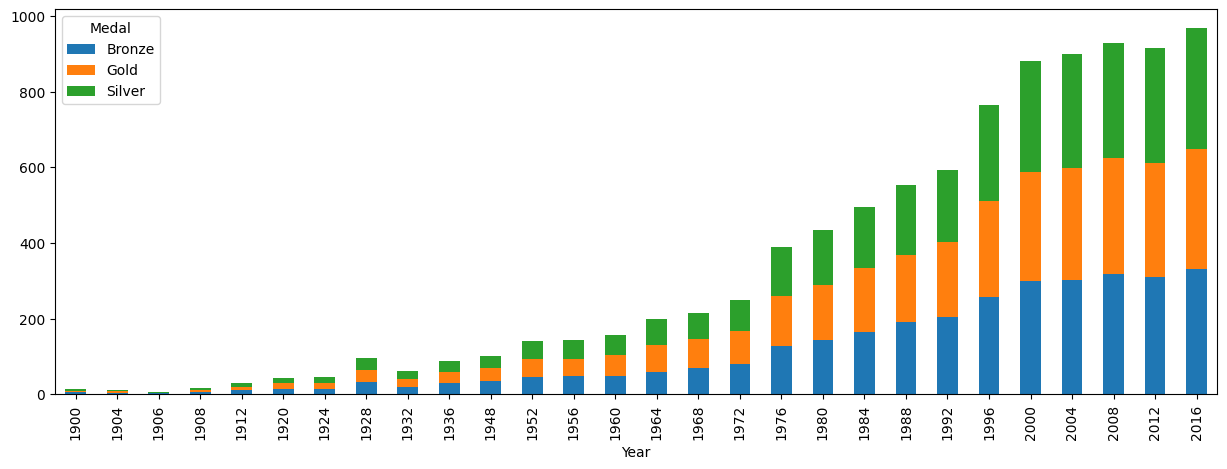

In [25]:
# agrupar por año y medalla

df_women.groupby(['Year','Medal']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,5))

### 4. Medallas de oro por país 


In [26]:
# Encontrar los cinco países con mayor número de medallas de oro 

df_MedallasOro['region'].value_counts().head(5)


region
USA        2638
Russia     1599
Germany    1301
UK          678
Italy       575
Name: count, dtype: int64

<Axes: xlabel='region'>

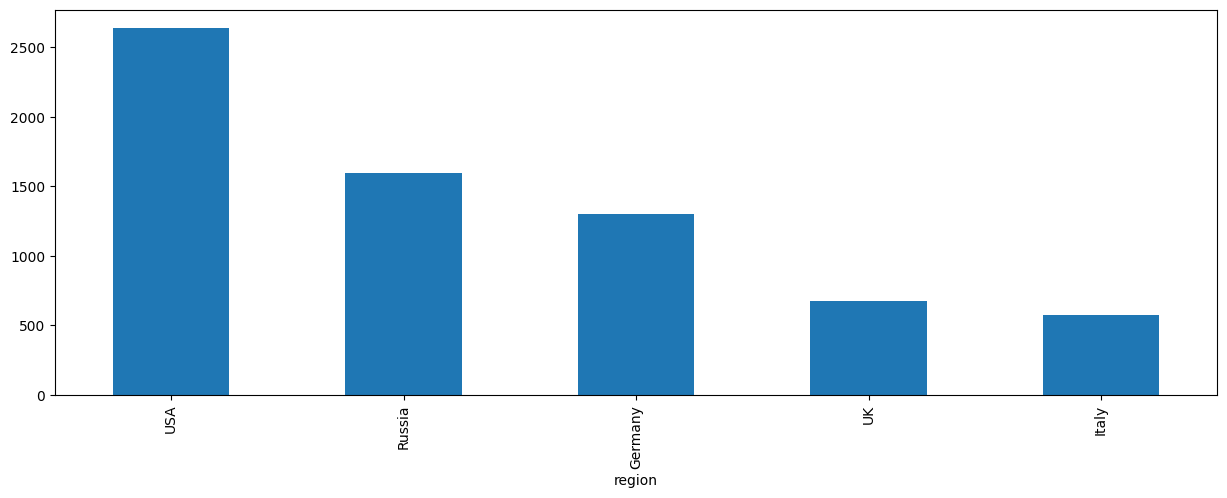

In [27]:

df_MedallasOro['region'].value_counts().head(5).plot(kind='bar', figsize=(15,5))

# Ejercicio

**Parte 1**

Crear un dataframe para México llamado df_Mexico (solo datos de México)

<div class="alert alert-success">
   
1. Mostrar la distribución de edades (frecuencias). 
</div>

<Axes: ylabel='Frequency'>

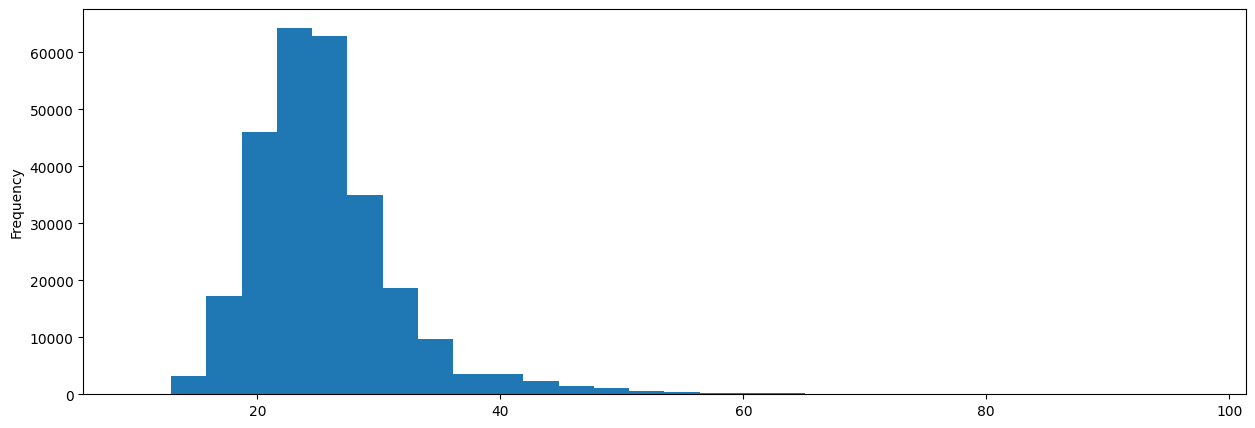

In [28]:
df['Age'].plot(kind='hist', bins=30, figsize=(15,5))

<div class="alert alert-success">
   
2. Mostrar la participación de desportistas mexicanos en las competencias de Verano (frecuencias). 
</div>

<Axes: xlabel='Year'>

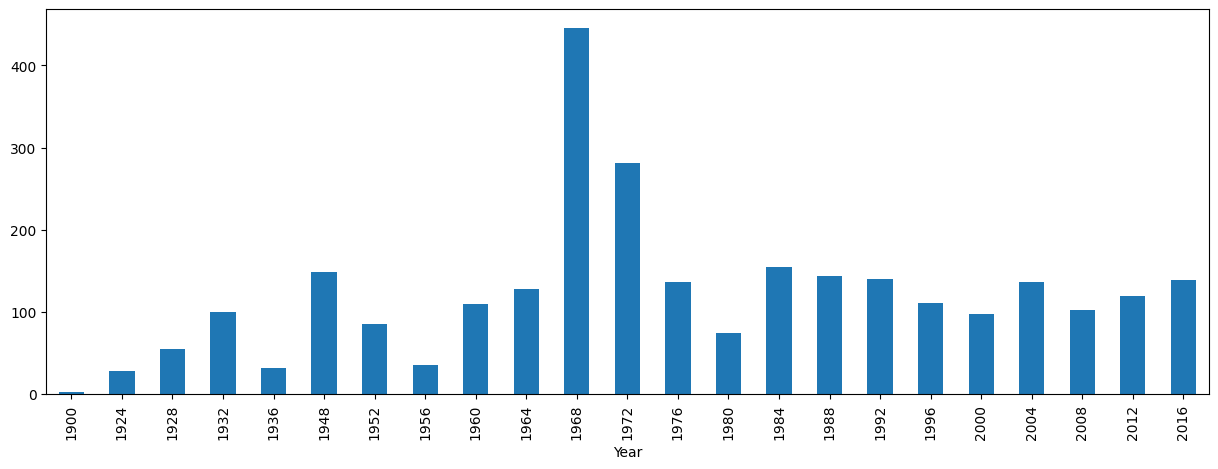

In [29]:
df[(df['region']=='Mexico')&(df['Season']=='Summer')].groupby('Year').size().plot(kind='bar', figsize=(15,5))

<div class="alert alert-success">
   
3. Encontrar el numero total de medallas de oro, plata y bronce. 
</div>

In [30]:
df['Medal'].value_counts()

Medal
Gold      13371
Bronze    13291
Silver    13112
Name: count, dtype: int64

<Axes: xlabel='Medal'>

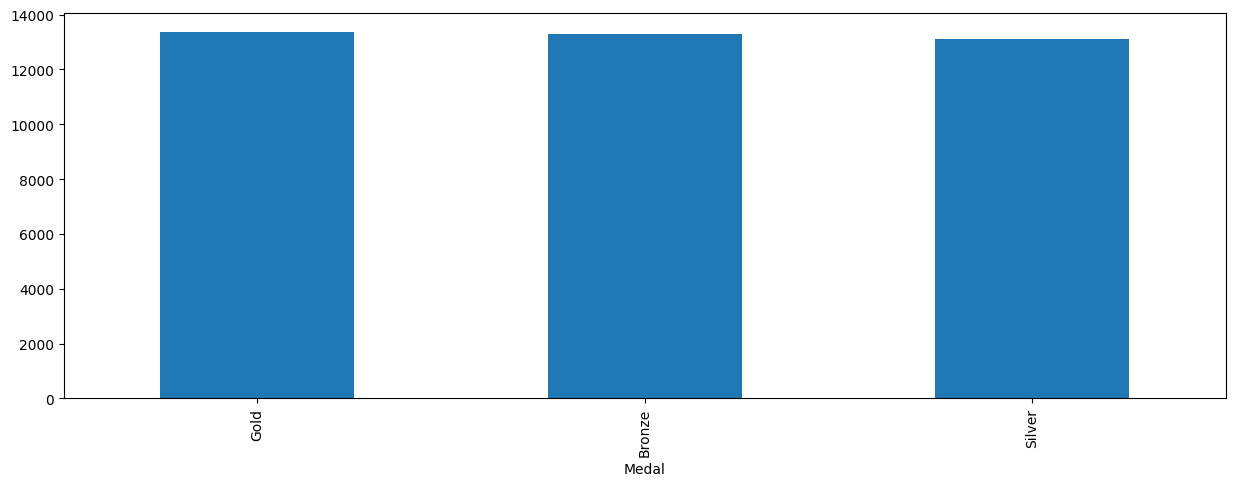

In [31]:
df['Medal'].value_counts().plot(kind='bar', figsize=(15,5))

<div class="alert alert-success">

4. Encontrar a los deportistas mexicanos con 2 o más medallas. 
</div>


<Axes: xlabel='Name'>

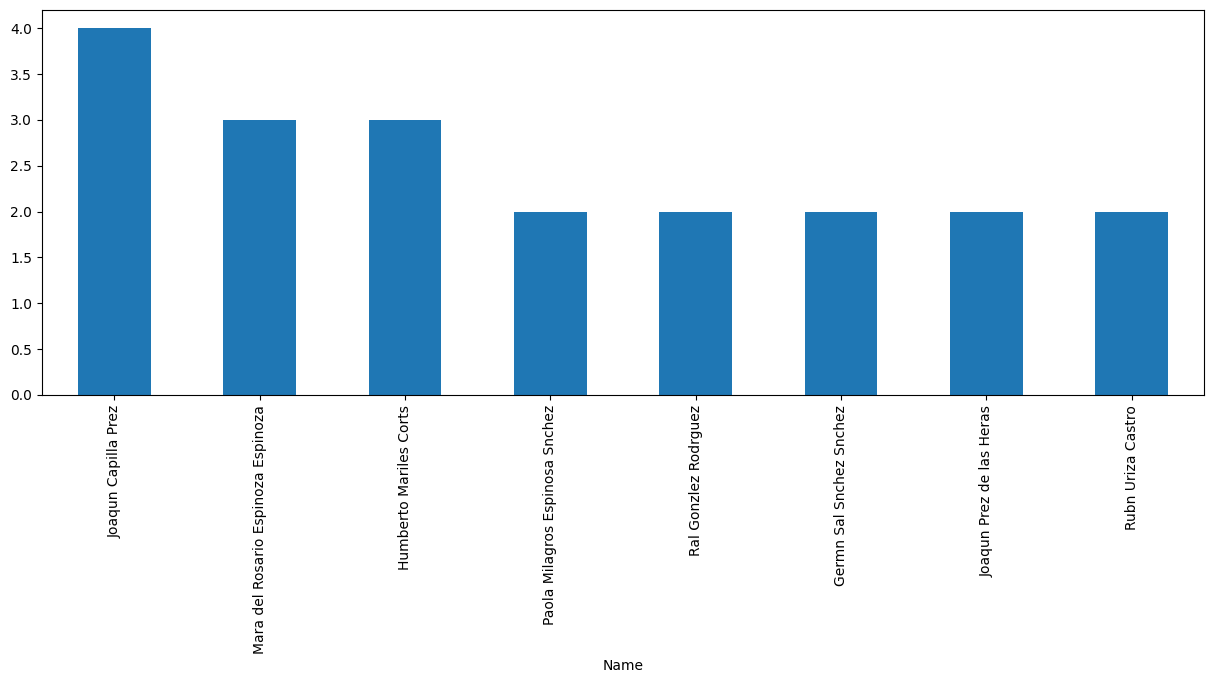

In [32]:
# encontrar los mexicanos con 2 o más medallas 
df_mexicanos = df[(df['region']=='Mexico')&(df['Medal'].notnull())]
df_mexicanos['Name'].value_counts().head(8).plot(kind='bar', figsize=(15,5))

# Ejercicio

**Parte 2**

*Utilizar todos los datos* 

<div class="alert alert-success">

5. Encontrar a los 5 deportistas con más medallas de oro en los juegos de Verano. 
</div>

<Axes: xlabel='Name'>

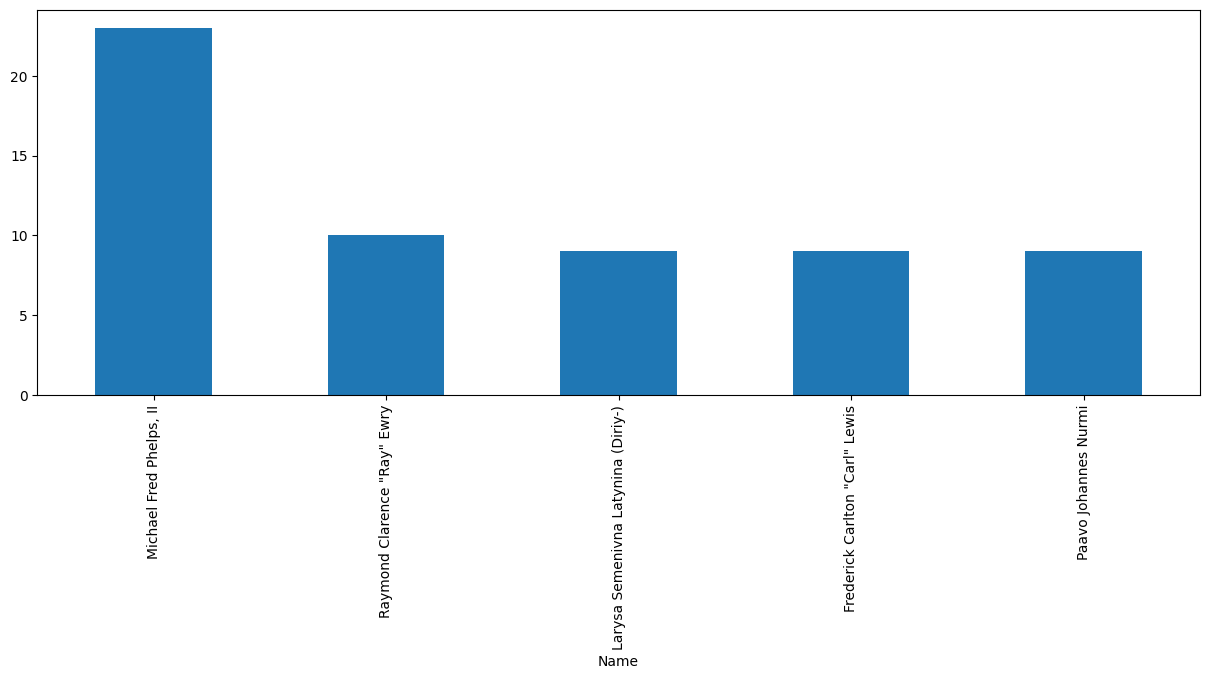

In [33]:
# encontrar los 5 deportitas con más medallas de oro en los juegos de verano

df_MedallasOro['Name'].value_counts().head(5).plot(kind='bar', figsize=(15,5))

<div class="alert alert-success">
6. Encontrar el deportista (o deportistas) más joven en ganar un medalla de oro, también mencionar: la edad, año de obtención, disciplina y juegos (verano o invierno,). 
</div>

In [34]:
# encontrar el deportista o desportisas más joven en ganar una medalla de oro, también mostar la edad, año de obtención, diciplina y juegos (ya sea de verano o invierno) 

df_MedallasOro[df_MedallasOro['Age']==df_MedallasOro['Age'].min()][['Name','Age','Year','Sport','Season']].sort_values(['Year','Sport'], ascending=[True,True])

,Name,Age,Year,Sport,Season
ID,,,,,
100797,Aileen Muriel Riggin (-Soule),13.0,1920,Diving,Summer
14142,Hans Bourquin,13.0,1928,Rowing,Summer
39866,Marjorie Gestring (-Redlick),13.0,1936,Diving,Summer
134381,Klaus Zerta,13.0,1960,Rowing,Summer
26731,Donna Elizabeth de Varona (-Pinto),13.0,1960,Swimming,Summer
37398,Fu Mingxia,13.0,1992,Diving,Summer
60384,Kim Yun-Mi,13.0,1994,Short Track Speed Skating,Winter


<div class="alert alert-success">

7. ¿Qué deporte (sport) ha tenido el mayor número de participantes  en toda su historia (contando solo lo reportado en el archivo)? 

</div>

<Axes: xlabel='Sport'>

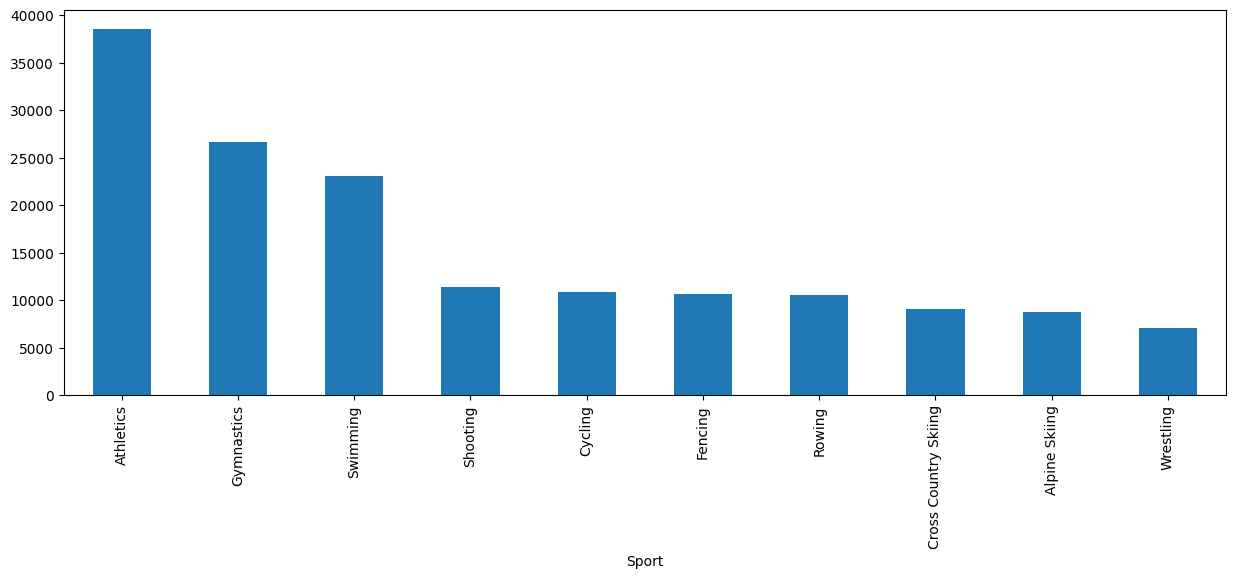

In [35]:
df.groupby(['Sport']).size().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(15,5))